# Projet spécialité Data-IA

# Analyse de données : l'évolution et la prévision de la production de véhicules dans le monde

Dans une façon de penser plus "vert", nous pouvons réduire la pollution mondiale en adaptant la production de véhicules afin de limiter la surproduction, mais cela permettrait aussi de générer plus de revenu et de faire plus d'économie pour vous les grands groupes de l'automobile. 

# Scrapping des données mondiales

In [90]:
import requests # requêter sur le site
from bs4 import BeautifulSoup # parcourir le HTML
import pandas as pd # formatter les données/exporter en CSV

## Les ventes de véhicules, par années/pays/continent de 1999 à aujourd'hui

Nous avons trouvé le site de OICA. Une rubrique répertorie la production de véhicules motorisés dans le monde depuis 1999.

L'idée est donc de scraper ces données, dans la catégorie <b>production-statistics/{ANNÉE}-statistics</b>

Nous travaillerons depuis 2000.

Problématique : le site sur lequel nous sommes tombés permet de récupérer les données en scrappant, ou en téléchargeant le format CSV. Les CSV permettent de connaitre les continents.
Mais la mise en page change souvent.

Pour les continents, un module Python existe, AWOC

# AWOC (test)

In [91]:
# # Import the AWOC package.
# import awoc

# # Initialize the AWOC class.
# my_world = awoc.AWOC()

# # Let's retrieve the full list of nations of Europe.
# countries_of_europe = my_world.get_countries_list_of('Europe')
# print(countries_of_europe)
# # It returns: [ 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', and so on... ]

# # We can get the whole country data as well.
# italy_data = my_world.get_country_data('Italy')

# print(my_world.get_continents())

# PYCountry_Convert

Test avec ce module

In [92]:
import pycountry_convert as pc

def get_continent(country_alpha2):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except ValueError:
        return None

# Exemple d'utilisation
country_alpha2 = "US"  # Code ISO 3166-1 alpha-2 des États-Unis
continent = get_continent(country_alpha2)

if continent:
    print(f"Le continent de {country_alpha2} est {continent}.")
else:
    print(f"Impossible de déterminer le continent pour {country_alpha2}.")

Le continent de US est North America.


# Scraping des données

Un site repertorie la production totale de véhicules automobiles dans le monde (particulère et commerciale).
'https://www.oica.net/category/production-statistics/'

In [93]:
import datetime

def get_current_year() -> int: 
    """ 
    for automatisation of the dataset. In 2025, 
    the program will research for the 2025's web page
    """
    today = datetime.date.today()
    year = today.year
    print(year)

    return year

def convert_to_csv(world_production_list: list):
    """
    convert the world production list to a csv file
    """
    df = pd.DataFrame(world_production_list)
    print(df.head(10))
    # df.insert(0, 'ID', range(1, len(quote_list) +1))
    df.to_csv(f'word_car_production_{begin_year}_{end_year}.csv', index=False, sep=';')

def scrape_page(soup: BeautifulSoup, world_production_list: list, start, end):
    """
    scrap page of the website
    """
    table = soup.find("tbody")
    countries = table.find_all("tr")

    # print(countries)

    for country_tr in countries:
        country_name = country_tr.find("td", {"class": f"column-1"}).text
        nbr_cars = country_tr.find("td", {"class": f"column-2"}).text
        nbr_commercial_vehicle = country_tr.find("td", {"class": f"column-3"}).text
        total = country_tr.find("td", {"class": f"column-4"}).text
        percent_change = country_tr.find("td", {"class": f"column-5"}).text

        # print(country_tr)
        # print(country_name)

        dict = {
            'Year': '',
            'Country_Name': '',
            'Nbr_Cars': '',
            'Nbr_Commercial_Vehicle': '',
            'Total': '',
            'Percent_Change': ''
        }

        dict['Year'] = start
        dict["Country_Name"] = country_name
        dict["Nbr_Cars"] = nbr_cars
        dict["Nbr_Commercial_Vehicle"] = nbr_commercial_vehicle
        dict["Total"] = total
        dict["Percent_Change"] = percent_change

        world_production_list.append(dict)

    start += 1

    if start <= end_year:
        print('Accès à la page suivante')
        next_url = f'{target}{start}-statistics'
        print(f"Next URL : {next_url}")
        req = requests.get(target +  next_url)
        next_soup = BeautifulSoup(req.text, "html.parser")
        scrape_page(next_soup, world_production_list, start, end)

    return 

# begin_year = 2015
begin_year = 2000
end_year = get_current_year() - 1

target = f'https://www.oica.net/category/production-statistics/'
# https://www.oica.net/category/production-statistics/2015-statistics/
req = requests.get(target + f'{begin_year}-statistics')

if req.status_code != 200:
    print("Erreur")
    exit(0)
else:
    print(f"Accès au site {target}, status = {req.status_code}")

soup = BeautifulSoup(req.text, "html.parser")

if __name__ == "__main__":
    print(f"Date de début {begin_year}; Date de fin : {end_year}")

    world_production_list = []
    # print(world_production_list)
    scrape_page(soup, world_production_list, begin_year, end_year)
    print(world_production_list)
    convert_to_csv(world_production_list)


2024
Accès au site https://www.oica.net/category/production-statistics/, status = 200
Date de début 2000; Date de fin : 2023
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2001-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2002-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2003-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2004-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2005-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2006-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2007-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2008-statistics
Accès à la page suivante
Next URL : https:/

# Amélioration du dataset

Afin d'afficher les données via une carte du monde, nous avons le nom des pays, mais aimerions également avoir les continents.

## Rajout des continents

Afin de réaliser notre storytelling, nous souhaitons faire une étude par pays, mais également pas continent et dans le monde. Il faut alors ajouter une colonne continent pour nos données

In [94]:
import pandas as pd
import pycountry_convert as pc

In [95]:
df = pd.read_csv(f"./word_car_production_{begin_year}_{end_year}.csv", delimiter=";")

df.head()

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change
0,2000,Argentina,"238,921","100,711","339,632",11.4%
1,2000,Australia,"323,649","23,473","347,122",14.6%
2,2000,Austria,"115,979","25,047","141,026",1.2%
3,2000,Belgium,"912,233","121,061","1,033,294",1.6%
4,2000,Brazil,"1,351,998","329,519","1,681,517",24.5%


In [96]:
df.describe()

,Year
count,957.000000
mean,2011.457680
std,6.901999
min,2000.000000
25%,2005.000000
50%,2011.000000
75%,2017.000000
max,2023.000000


In [97]:
df.columns

Index(['Year', 'Country_Name', 'Nbr_Cars', 'Nbr_Commercial_Vehicle', 'Total',
       'Percent_Change'],
      dtype='object')

### Corriger les erreurs de noms de pays

Certains pays posent problème car il ne sont pas formatés correctement pour pycountry_convert. Nous remplaçons alors leur nom par un format adéquat.

In [98]:
# Correct format for Czech Republic
# df['Country_Name'] = df['Country_Name'].replace('Czech Rep.', 'Czech Republic')
df['Country_Name'] = df['Country_Name'].replace('Czech Rep.', 'Czechia')

# Format correct for United Kingdom
df['Country_Name'] = df['Country_Name'].replace('UK', 'United Kingdom')

In [99]:
df.head(10)

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change
0,2000,Argentina,"238,921","100,711","339,632",11.4%
1,2000,Australia,"323,649","23,473","347,122",14.6%
2,2000,Austria,"115,979","25,047","141,026",1.2%
3,2000,Belgium,"912,233","121,061","1,033,294",1.6%
4,2000,Brazil,"1,351,998","329,519","1,681,517",24.5%
5,2000,Canada,"1,550,500","1,411,136","2,961,636",-3.2%
6,2000,China,"604,677","1,464,392","2,069,069",13.1%
7,2000,Czechia,"428,224","27,268","455,492",21.1%
8,2000,Egypt,"39,616","20,149","59,765",-21.4%
9,2000,Finland,"38,468",458,"38,926",13.2%


In [100]:
select_country = df.loc[df['Year'] == 2023]
print(select_country)

     Year    Country_Name    Nbr_Cars Nbr_Commercial_Vehicle       Total  \
918  2023       ARGENTINA     304 783                305 942     610 725   
919  2023         AUSTRIA     102 291                 11 900     114 191   
920  2023         BELGIUM     285 159                 46 944     332 103   
921  2023          BRAZIL   1 781 612                543 226   2 324 838   
922  2023          CANADA     376 888              1 176 138   1 553 026   
923  2023           CHINA  26 123 757              4 037 209  30 160 966   
924  2023  CZECH REPUBLIC   1 397 816                  6 685   1 404 501   
925  2023         FINLAND      30 191                    NaN      30 191   
926  2023          FRANCE   1 026 690                478 386   1 505 076   
927  2023         GERMANY   4 109 371                    NaN   4 109 371   
928  2023         HUNGARY     507 225                    NaN     507 225   
929  2023           INDIA   4 783 628              1 067 879   5 851 507   
930  2023   

In [101]:
def get_continent_name(row):
    """
    get the continent code for a dataframe's row
    """
    print(row)
    try:
        if type(row.Country_Name) == float:
            return
        
        if row.Country_Name.lower() == 'total':
            return 'Entire World'
        
        if row.Country_Name.lower() == 'supplementary':
            row.Country_Name = 'Others'
        
        if row.Country_Name.lower() == 'others':
            return 'Other'
            
        country_alpha2 = pc.country_name_to_country_alpha2(row.Country_Name.title() if row.Country_Name != 'USA' else row.Country_Name, cn_name_format="default")
        # print(row.Country_Name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        return continent_name
    
    except (ValueError, KeyError, TypeError) as e:
        print(f"Erreur lors de la conversion pour {row.Country_Name}: {e}")
        print(row)
        return None

In [102]:
df['Continent'] = df.apply(get_continent_name, axis=1)

Year                           2000
Country_Name              Argentina
Nbr_Cars                    238,921
Nbr_Commercial_Vehicle      100,711
Total                       339,632
Percent_Change                11.4%
Name: 0, dtype: object
Year                           2000
Country_Name              Australia
Nbr_Cars                    323,649
Nbr_Commercial_Vehicle       23,473
Total                       347,122
Percent_Change                14.6%
Name: 1, dtype: object
Year                         2000
Country_Name              Austria
Nbr_Cars                  115,979
Nbr_Commercial_Vehicle     25,047
Total                     141,026
Percent_Change               1.2%
Name: 2, dtype: object
Year                           2000
Country_Name                Belgium
Nbr_Cars                    912,233
Nbr_Commercial_Vehicle      121,061
Total                     1,033,294
Percent_Change                 1.6%
Name: 3, dtype: object
Year                           2000
Country_Name        

In [103]:
df.head(41)

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change,Continent
0,2000,Argentina,"238,921","100,711","339,632",11.4%,South America
1,2000,Australia,"323,649","23,473","347,122",14.6%,Oceania
2,2000,Austria,"115,979","25,047","141,026",1.2%,Europe
3,2000,Belgium,"912,233","121,061","1,033,294",1.6%,Europe
4,2000,Brazil,"1,351,998","329,519","1,681,517",24.5%,South America
5,2000,Canada,"1,550,500","1,411,136","2,961,636",-3.2%,North America
6,2000,China,"604,677","1,464,392","2,069,069",13.1%,Asia
7,2000,Czechia,"428,224","27,268","455,492",21.1%,Europe
8,2000,Egypt,"39,616","20,149","59,765",-21.4%,Africa
9,2000,Finland,"38,468",458,"38,926",13.2%,Europe


In [104]:
select_country = df.loc[df['Country_Name'] == 'France']
print(select_country)

     Year Country_Name   Nbr_Cars Nbr_Commercial_Vehicle      Total  \
10   2000       France  2,879,810                468,551  3,348,361   
50   2001       France  3,181,549                446,869  3,628,418   
90   2002       France  3,292,797                309,073  3,601,870   
130  2003       France  3,220,329                399,737  3,620,066   
170  2004       France  3,227,416                438,574  3,665,990   
210  2005       France  3,112,961                436,047  3,549,008   
250  2006       France  2,723,196                446,023  3,169,219   
290  2007       France  2,550,869                464,985  3,015,854   
330  2008       France  2,145,935                423,043  2,568,978   
370  2009       France  1,819,497                228,196  2,047,693   
410  2010       France  1,924,171                305,250  2,229,421   
450  2011       France  1,931,030                311,898  2,242,928   
490  2012       France  1,682,814                284,951  1,967,765   
530  2

In [105]:
df.dtypes

Year                       int64
Country_Name              object
Nbr_Cars                  object
Nbr_Commercial_Vehicle    object
Total                     object
Percent_Change            object
Continent                 object
dtype: object

Convertir la colonne <b>Year</b> en datetime

In [106]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [107]:
df.dtypes

Year                      datetime64[ns]
Country_Name                      object
Nbr_Cars                          object
Nbr_Commercial_Vehicle            object
Total                             object
Percent_Change                    object
Continent                         object
dtype: object

In [108]:
df = df.dropna(subset=['Country_Name'])
df.head()

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change,Continent
0,2000-01-01,Argentina,"238,921","100,711","339,632",11.4%,South America
1,2000-01-01,Australia,"323,649","23,473","347,122",14.6%,Oceania
2,2000-01-01,Austria,"115,979","25,047","141,026",1.2%,Europe
3,2000-01-01,Belgium,"912,233","121,061","1,033,294",1.6%,Europe
4,2000-01-01,Brazil,"1,351,998","329,519","1,681,517",24.5%,South America


In [109]:
years = df['Year'].unique()

for i in range(len(years)):
    select_top_country_by_year = df.groupby(df['Year'].dt.year)['Total'].max().reset_index()

print(select_top_country_by_year)

    Year       Total
0   2000     801,360
1   2001   9,777,191
2   2002     894,796
3   2003      95,247
4   2004     927,981
5   2005      95,814
6   2006     987,780
7   2007     997,240
8   2008     952,840
9   2009     999,378
10  2010      94,132
11  2011     838,388
12  2012     926,555
13  2013     975,000
14  2014     971,160
15  2015     982,337
16  2016     920,162
17  2017       99880
18  2018     9728528
19  2019     9684298
20  2020      987044
21  2021       95797
22  2022      876614
23  2023  93 546 599


## Enlever les virgules des entiers

Nous décidons d'enlever les virgules pour le moment, pour pouvoir mettre ces valeurs en tant qu'entiers sur les applications que nous utiliserons ou non, comme PowerBI, qui n'accepte pas les entiers qui sont de la forme 2,555,555. Nous allons les mettre de la forme 2555555 et tester également de la forme 2.555.555.

In [110]:
dot_to_delete_cols = ['Nbr_Cars', 'Nbr_Commercial_Vehicle',	'Total']

for col in dot_to_delete_cols:
    df[col] = df[col].replace(',', '', regex=True)
    df[col] = df[col].replace(' ', '', regex=True)

In [111]:
df['Country_Name'] = df['Country_Name'].str.capitalize()

### Enlever les lignes "total"

Enlever les lignes totales pour qu'elles ne soient pas prises en comptes lors des visuels (exmeple: USA = 5000; France = 4000; Total = 9000).

Lors des visuels, la valeur va prende 18000, car elle va aussi compter le total.

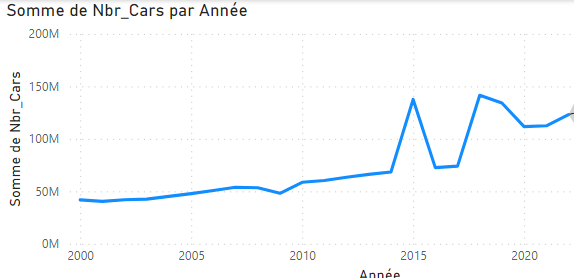

A partir de 2015, des lignes permettant de voir le Total apparaissent, et faussent donc les données.

### Remplacer les valeurs nulles, ou autre que des chiffres par 0

In [112]:
columns = ['Nbr_Cars', 'Nbr_Commercial_Vehicle', 'Total', 'Percent_Change']

In [113]:
for col in columns:
    df[col] = df[col].replace({'-': 0, 'N.A.': 0}).fillna(0)

### Rajouter des '%' pour chaque valeur de la colonne de pourcentage d'évolution

In [114]:
def add_percent(value):
    if isinstance(value, str) and not value.endswith('%'):
        return value + '%'
    elif isinstance(value, (int, float)):
        return str(value) + '%'
    else:
        return value

df['Percent_Change'] = df['Percent_Change'].apply(add_percent)


# Exporter le dataframe en CSV

In [115]:
filename_to_save = f'world_car_production_{begin_year}-{end_year}_clean.csv'
df.to_csv(filename_to_save, index=False, sep=';')

PBI : Fichier > Options et paramètres > Options > Fonctionnalités en préversion > Intéractions sur l'objet => ACTIVER 

# La situtation passée et actuelle sur la production automobile

# Statistiques

In [116]:
df.head()

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change,Continent
0,2000-01-01,Argentina,238921,100711,339632,11.4%,South America
1,2000-01-01,Australia,323649,23473,347122,14.6%,Oceania
2,2000-01-01,Austria,115979,25047,141026,1.2%,Europe
3,2000-01-01,Belgium,912233,121061,1033294,1.6%,Europe
4,2000-01-01,Brazil,1351998,329519,1681517,24.5%,South America


In [117]:
df.dtypes

Year                      datetime64[ns]
Country_Name                      object
Nbr_Cars                          object
Nbr_Commercial_Vehicle            object
Total                             object
Percent_Change                    object
Continent                         object
dtype: object

In [118]:
df['Nbr_Cars'] = pd.to_numeric(df['Nbr_Cars'])
df['Nbr_Commercial_Vehicle'] = pd.to_numeric(df['Nbr_Commercial_Vehicle'])
df['Total'] = pd.to_numeric(df['Total'])

In [119]:
df.dtypes

Year                      datetime64[ns]
Country_Name                      object
Nbr_Cars                           int64
Nbr_Commercial_Vehicle             int64
Total                              int64
Percent_Change                    object
Continent                         object
dtype: object

Créer un fonction qui prend en paramètre une date (format YYYY-MM-DD), un pays ou un continent. Et affiche la repartition des types de véhicules sur le total

Year                             2020-01-01 00:00:00
Country_Name                                  France
Nbr_Cars                                      927718
Nbr_Commercial_Vehicle                        388653
Total                                        1316371
Percent_Change                                  -39%
Continent                                     Europe
Car_Percentage                             70.475421
Commercial_Vehicle_Percentage              29.524579
Name: 810, dtype: object
Pour France en 2020-01-01 00:00:00:
  - Pourcentage de voitures : 70.48%
  - Pourcentage de véhicules commerciaux : 29.52%



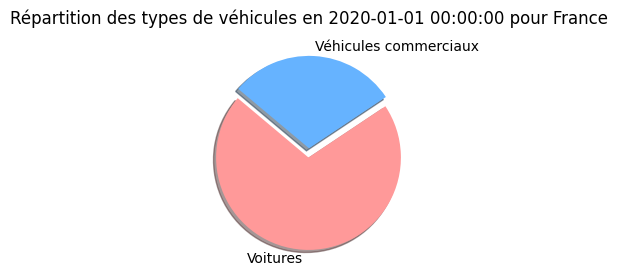

In [137]:
# def print_stats(df, date, place):
    # countries = df['Country_Name'].unique()
    # continents = df['Continent'].unique()

#     print(countries)
#     print(continents)

# print(print_stats(df, date=None, place='Austria'))

import matplotlib.pyplot as plt

def plot_data(row):
    labels = ['Voitures', 'Véhicules commerciaux']
    sizes = [row['Car_Percentage'], row['Commercial_Vehicle_Percentage']]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # "explode" la première tranche (Voitures)
    
    # Tracer le camembert
    plt.figure(figsize=(3, 3))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            shadow=True, startangle=140)
    plt.title(f"Répartition des types de véhicules en {row['Year']} pour {row['Country_Name']}")
    plt.show()

def get_place_list(df):
    return df['Country_Name'].unique(), df['Continent'].unique()

def repartition_vehicles(date, place):
    filtered_df = df[df['Year'] == date]
    countries, continents = get_place_list(df=df)
    
    if place in countries:
        filtered_df = filtered_df[filtered_df['Country_Name'] == place]
    elif place in continents:
        filtered_df = filtered_df[filtered_df['Continent'] == place]
    
    if filtered_df.empty:
        print("Aucune donnée trouvée pour les critères spécifiés.")
        return

    # Calculer la répartition des types de véhicules
    filtered_df['Car_Percentage'] = (filtered_df['Nbr_Cars'] / filtered_df['Total']) * 100
    filtered_df['Commercial_Vehicle_Percentage'] = (filtered_df['Nbr_Commercial_Vehicle'] / filtered_df['Total']) * 100
    
    # print(filtered_df)

    # Afficher les résultats
    for index, row in filtered_df.iterrows():
        print(row)
        print(f"Pour {row['Country_Name']} en {row['Year']}:")
        print(f"  - Pourcentage de voitures : {row['Car_Percentage']:.2f}%")
        print(f"  - Pourcentage de véhicules commerciaux : {row['Commercial_Vehicle_Percentage']:.2f}%\n")
        plot_data(row)

# Exemple d'utilisation de la fonction
# repartition_vehicles("2000-01-01", place="Brazil")
repartition_vehicles("2020-01-01", place="France")

In [142]:
df

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change,Continent
0,2000-01-01,Argentina,238921,100711,339632,11.4%,South America
1,2000-01-01,Australia,323649,23473,347122,14.6%,Oceania
2,2000-01-01,Austria,115979,25047,141026,1.2%,Europe
3,2000-01-01,Belgium,912233,121061,1033294,1.6%,Europe
4,2000-01-01,Brazil,1351998,329519,1681517,24.5%,South America
...,...,...,...,...,...,...,...
950,2023-01-01,United kingdom,905117,120357,1025474,17%,Europe
951,2023-01-01,Usa,1745171,8866384,10611555,6%,North America
952,2023-01-01,Uzbekistan,421414,4462,425876,25%,Asia
953,2023-01-01,Others,877579,1128618,2006197,0%,Other


          Year Country_Name  Nbr_Cars  Nbr_Commercial_Vehicle     Total  \
37  2000-01-01          Usa   5542217                 7257640  12799857   
77  2001-01-01          Usa   4879119                 6545570  11424689   
117 2002-01-01          Usa   5018777                 7260805  12279582   
157 2003-01-01          Usa   4510469                 7604502  12114971   
197 2004-01-01          Usa   4229625                 7759762  11989387   
237 2005-01-01          Usa   4321272                 7625381  11946653   
277 2006-01-01          Usa   4366220                 6897766  11263986   
317 2007-01-01          Usa   3924268                 6856461  10780729   
357 2008-01-01          Usa   3776641                 4895500   8672141   
397 2009-01-01          Usa   2195588                 3513843   5709431   
437 2010-01-01          Usa   2731105                 5011988   7743093   
477 2011-01-01          Usa   2976991                 5684544   8661535   
517 2012-01-01          U

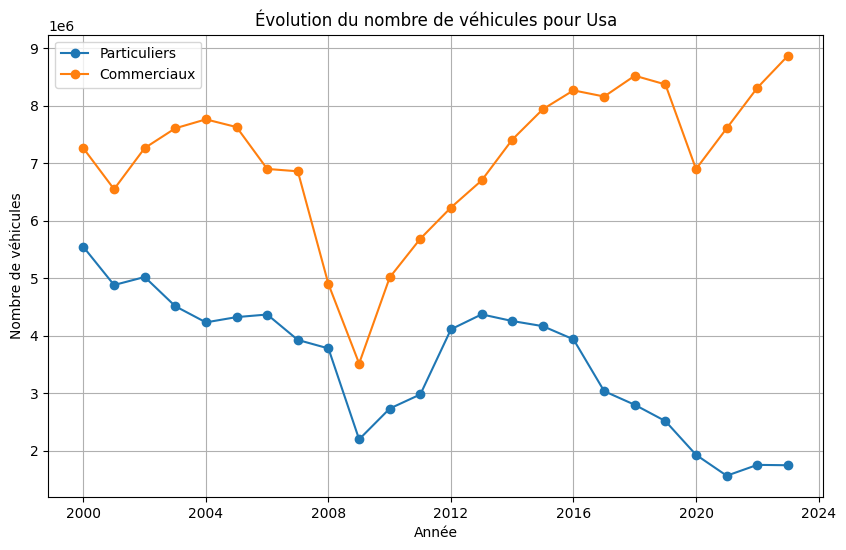

In [163]:
def plot_vehicle_evolution(country=None, continent=None):
    # Filtrer les données en fonction des paramètres
    filtered_df = df.copy()
    
    if country:
        filtered_df = filtered_df[filtered_df['Country_Name'] == country]
    elif continent:
        filtered_df = filtered_df[filtered_df['Continent'] == continent]
        # filtered_df = filtered_df.groupby('Year').agg({
        #             'Nbr_Cars': 'sum',
        #             'Nbr_Commercial_Vehicle': 'sum'
        #         }).reset_index()    
    if filtered_df.empty:
        print("Aucune donnée trouvée pour les critères spécifiés.")
        return
    
    print(filtered_df)

    # Tracer le graphique de l'évolution
    plt.figure(figsize=(10, 6))
    
    plt.plot(filtered_df['Year'], filtered_df['Nbr_Cars'], marker='o', label='Particuliers')
    plt.plot(filtered_df['Year'], filtered_df['Nbr_Commercial_Vehicle'], marker='o', label='Commerciaux')
    
    plt.xlabel('Année')
    plt.ylabel('Nombre de véhicules')
    plt.title(f"Évolution du nombre de véhicules {'pour ' + country if country else 'en ' + continent}")
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Exemple d'utilisation de la fonction
plot_vehicle_evolution(country="Usa")
